In [66]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#importing all_data
all_data = pd.read_csv('comb_all_data.csv', low_memory=False)


In [29]:
all_data.head(8)

,Price,Make,Model,Body Style,City,State,Milage,Color,Age
0,49876,AC,Shelby Cobra,Convertible,Matthews,NC,0.000322,Red,0.500000
1,44999,AC,Shelby Cobra,Convertible,Nashville,TN,0.003643,Blue,0.500000
2,7500,Acura,Integra,Coupe,College Station,TX,0.045896,Red,0.241071
3,7500,Acura,Integra,Coupe,College Station,TX,0.045896,Black,0.241071
4,7500,Acura,Integra,Coupe,College Station,TX,0.045896,White,0.241071
5,7500,Acura,Integra,Coupe,College Station,TX,0.045896,Blue,0.241071
6,79950,Acura,NSX,Coupe,Huntingdon Valley,PA,0.015801,Black,0.232143
7,59900,Acura,NSX,Coupe,Virginia Beach,VA,0.020218,Orange,0.223214


In [30]:
#shuffling all the rows
all_data = all_data.sample(frac=1).reset_index(drop=True)

# taking the first 50k samples
sample = all_data.head(50000)

# saving 50k for testing and training model before scaling 
sample.to_csv('fiftyK.csv')

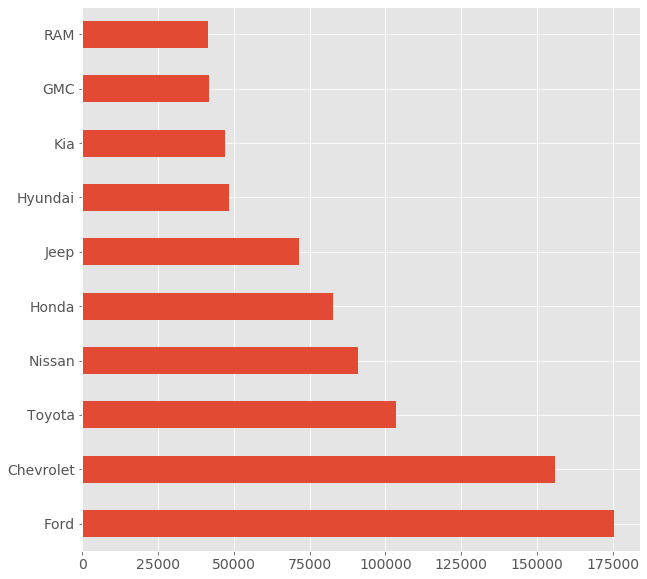

In [31]:
all_data['Make'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

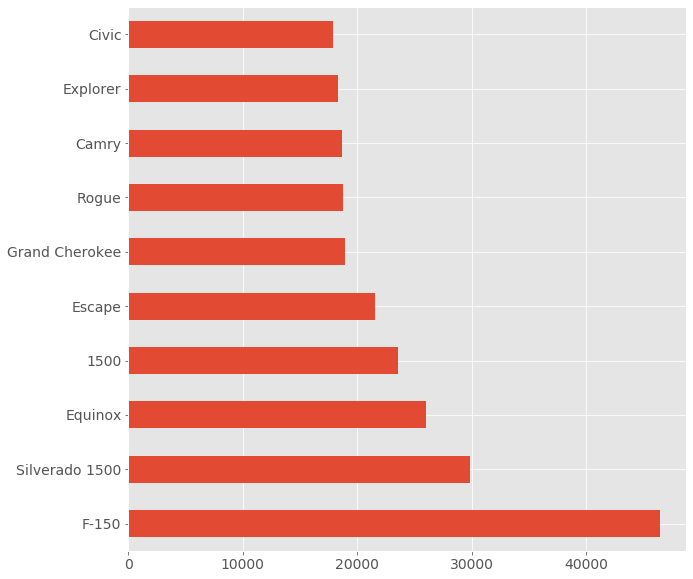

In [32]:
all_data['Model'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

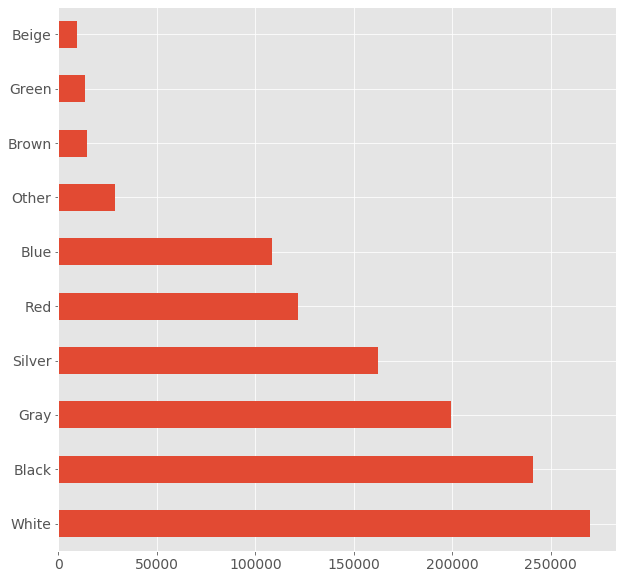

In [33]:
all_data['Color'].value_counts().head(10).plot(kind = 'barh', figsize = (10,10))

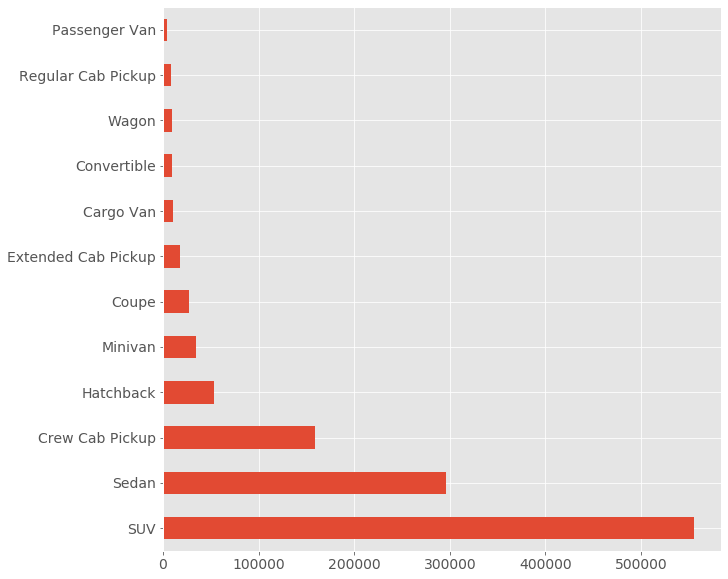

In [34]:
all_data['Body Style'].value_counts().head(12).plot(kind = 'barh', figsize = (10,10))

I just want to see what a basic linear regression looks like before I move on GraidentBoosting and Random Forest Before that I need to get dummies for my catagorical data..

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df_mazda = all_data[all_data['Make'] == 'Mazda']
df_mercedes = all_data[all_data['Make'] == 'Mercedes-Benz']
df_bmw =all_data[all_data['Make'] == 'BMW']
df_toyota =all_data[all_data['Make'] == 'Toyota']
df_ford = all_data[all_data['Make'] == 'Ford']
df_nissian = all_data[all_data['Make'] == 'Nissan']
df_dodge= all_data[all_data['Make'] == 'Dodge']
df_honda = all_data[all_data['Make'] == 'Honda']
df_audi = all_data[all_data['Make'] == 'Audi']
df_chevy = all_data[all_data['Make'] == 'Chevrolet']
top_ten = pd.concat([df_mercedes,df_bmw,df_chevy,df_audi,df_honda,df_dodge,df_nissian,df_ford,df_toyota,df_mazda])


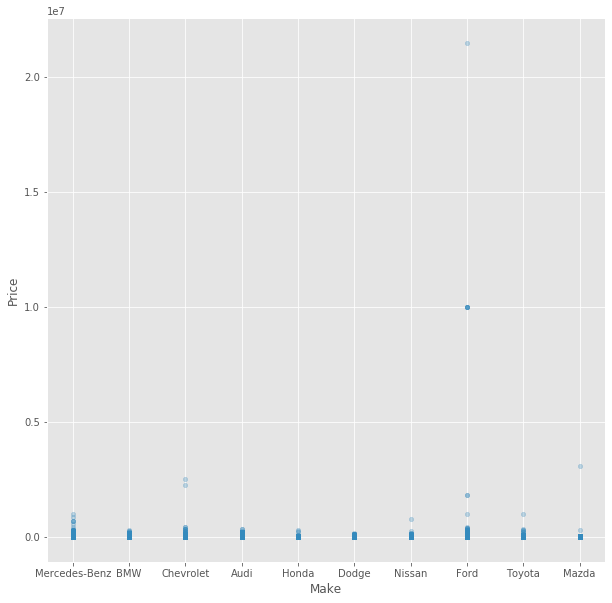

In [57]:
top_ten.plot.scatter(x = 'Make',y=('Price'), figsize=(10,10), alpha =.3)
plt.savefig('top_ten.png')

In [69]:
#back when I had less than a million samples I did some hypthesis testing
#on wether or not toyota's and mazdas on average were the same price
# as well as if BMW and Meredes average were the same price
# total number of Mazdas 322
# total number of Toyota 464
# total number of BMW's 478
# total number of Mercedes 411

print(len(df_mazda)) 
print(len(df_toyota))
print(len(df_bmw))
print(len(df_mercedes))


16641
103325
25771
12928


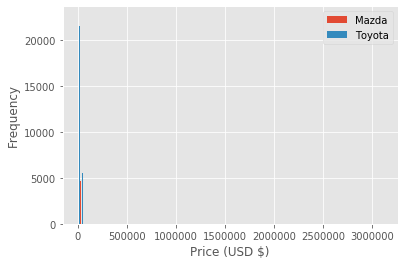

In [63]:
fig, ax1 = plt.subplots()
ax1.hist([df_mazda['Price'],df_toyota['Price']], label = ['Mazda', 'Toyota'], bins=500)
ax1.legend(loc='upper right')
ax1.set_xlabel('Price (USD $)')
ax1.set_ylabel('Frequency')


plt.savefig('mazda_toyota.png')
plt.show()

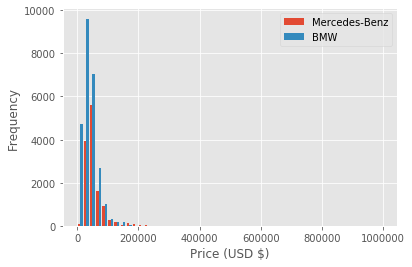

In [61]:
fig, ax1 = plt.subplots()
ax1.hist([df_mercedes['Price'],df_bmw['Price']], label = ['Mercedes-Benz', 'BMW'], bins=50)
ax1.legend(loc='upper right')
ax1.set_xlabel('Price (USD $)')
ax1.set_ylabel('Frequency')
#ax1.set_xlim(0,100000)

plt.savefig('bmw_mercedes2.png')
plt.show()

In [68]:
#I'm under the impression that the price of one car effects the price of another
print(stats.ttest_ind(df_bmw['Price'],df_mercedes['Price']))
print(stats.ttest_ind(df_toyota['Price'],df_mazda['Price']))

Ttest_indResult(statistic=-44.52067742193823, pvalue=0.0)
Ttest_indResult(statistic=20.25034629923531, pvalue=5.012553932581045e-91)


turns out with more cars, I can say with convidenace 
the average price for a mazda when compared to toyota's means I reject the null hypothese from capstone 1. 
